<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Cluster_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das bibliotecas

In [ ]:
#Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Importar a biblioteca para criação de gráficos
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import kelbow_visualizer #Ferramenta de visualização usada para auxiliar na identificação do número ideal de clusters.

# Carregar arquivo

In [ ]:
#Usa biblioteca pandas para abrir arquivo que contem os dados a serem analisados.
campanha = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
#Origem dos dados: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/code
#Usado o: sep='\t' - para o pandas ler o aquivo separados por tabulação é necessário usar o parâmetro sep na função

# Análise dos dados


    ID: Identificador único do cliente
    Year_Birth: Ano de nascimento do cliente
    Education: Nível de educação do cliente
    Marital_Status: Estado civil do cliente
    Income: renda familiar anual do cliente
    Kidhome: Número de crianças na casa do cliente
    Teenhome: Número de adolescentes na casa do cliente
    Dt_Customer: Data de inscrição do cliente com a empresa
    Recency: Número de dias desde a última compra do cliente
    Complain: 1 se o cliente reclamou nos últimos 2 anos, caso contrário 0

Produtos

    MntWines: Valor gasta em vinho nos últimos 2 anos
    MntFruits: Valor gasto em frutas nos últimos 2 anos
    MntMeatProducts: Valor gasta em carne nos últimos 2 anos
    MntFishProducts: Quantidade gasta em peixes nos últimos 2 anos
    MntSweetProducts: Valor gasta em doces nos últimos 2 anos
    MntGoldProds: Valor gasto em ouro nos últimos 2 anos

Promoção

    NumDealsPurchases: Número de compras feitas com desconto
    AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, caso contrário 0
    AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, caso contrário 0
    AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, caso contrário 0
    AceitoCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, caso contrário
    AcceptedCmp5: 1 se o cliente aceitar a oferta na 5ª campanha, caso contrário 0
    Response: 1 se o cliente aceitou a oferta na última campanha, caso contrário 0

Lugar

    NumWebPurchases: Número de compras feitas através do site da empresa
    NumCatalogPurchases: Número de compras feitas usando um catálogo
    NumStorePurchases: Número de compras feitas diretamente nas lojas
    NumWebVisitsMonth: Número de visitas ao site da empresa no último mês


In [ ]:
#Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado as 5 linhas iniciais
campanha.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Identificar tipos dos dados de cada coluna. Observado necessidade de correções (tipo de dados divergentes)
campanha.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#Outra forma, condensada, de verificar presença de valores nulos e os tipos de dados de cada coluna
campanha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Verificar e contar dados nulos em todas as colunas.
campanha.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Verificar concentração dos dados e/ ou discrepantes.
campanha.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Identificar se existe linhas duplicadas.
campanha.duplicated().sum()

0

# Pré-processamento

In [ ]:
#Convertendo a coluna 'Dt_Customer' para datetime
campanha['Dt_Customer'] = pd.to_datetime(campanha['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
#Mostras as linhas do dataframe onde a linha 'Income' está com valores nulos
campanha[(campanha['Income'].isna())]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Função para preencher valores nulos usando a média das linhas com características correspondentes
def preencher_valores_nulos():
  # Iterar sobre as linhas com valores nulos
  for index, row in campanha[campanha['Income'].isnull()].iterrows():
    # Selecionar as linhas onde as características correspondem a escolaridade e estado civil
    selecao = (campanha['Education'] == row['Education']) & (campanha['Marital_Status'] == row['Marital_Status'])
    linhas_selecionadas = campanha[selecao]

    # Calcular a média da coluna 'Income' apenas para as linhas selecionadas
    media = linhas_selecionadas['Income'].mean()

    # Preencher o valor nulo com a média calculada
    campanha.at[index, 'Income'] = media

# Chamar a função para preencher os dados nulos da coluna 'Income'
preencher_valores_nulos()

In [ ]:
#Confirmar que o processo de preenchimento dos dados nulos foi efetivo
campanha['Income'].isna().sum()

0

In [ ]:
#Criar uma coluna com a idade de cada usuário no ano de 2024
campanha["Age"] = 2024 - campanha["Year_Birth"]

In [ ]:
#Colunas com valore relevantes para identificar Outliers
colunas_valor = ('Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth')

In [ ]:
#Eliminar outliers extremos
campanha = campanha[campanha['Income'] < 666666]
campanha = campanha[campanha['MntMeatProducts'] < 1000]
campanha = campanha[campanha['MntSweetProducts'] < 200]
campanha = campanha[campanha['MntGoldProds'] < 262]
campanha = campanha[campanha['Age'] < 85]

In [ ]:
 #Criando o gráfico de caixa (boxplot) para visualizar os outliers das colunas após eliminar outliers extremos
def outliers(qual_coluna):
  plt.boxplot(campanha[qual_coluna], vert=False)
  plt.title(f'Gráfico com Outliers de {qual_coluna}')
  plt.xlabel('Valores')
  plt.show()

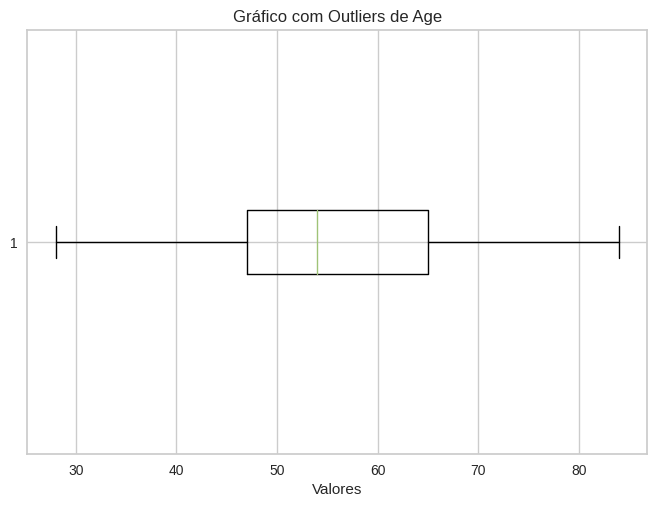

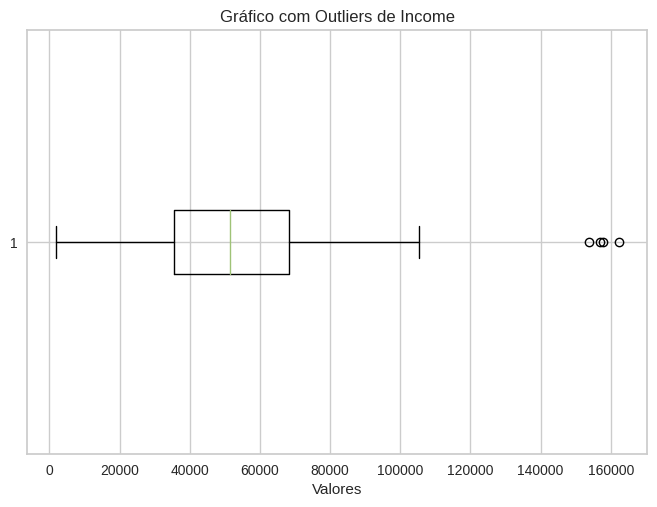

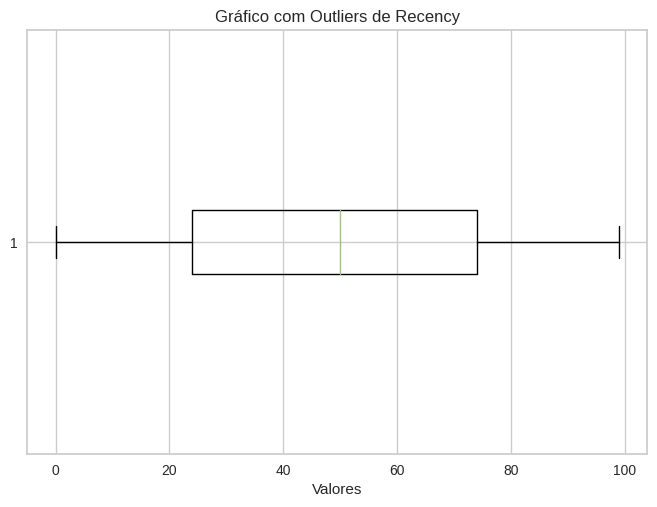

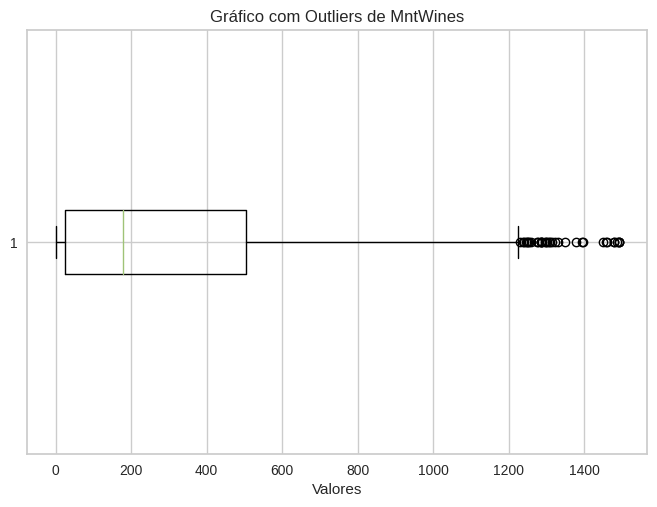

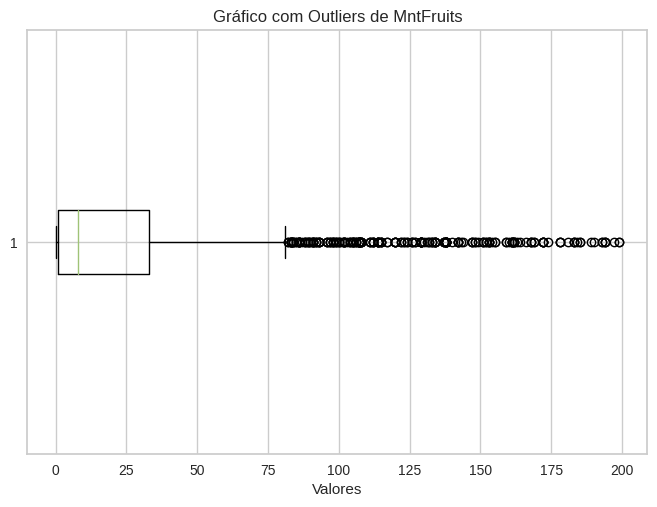

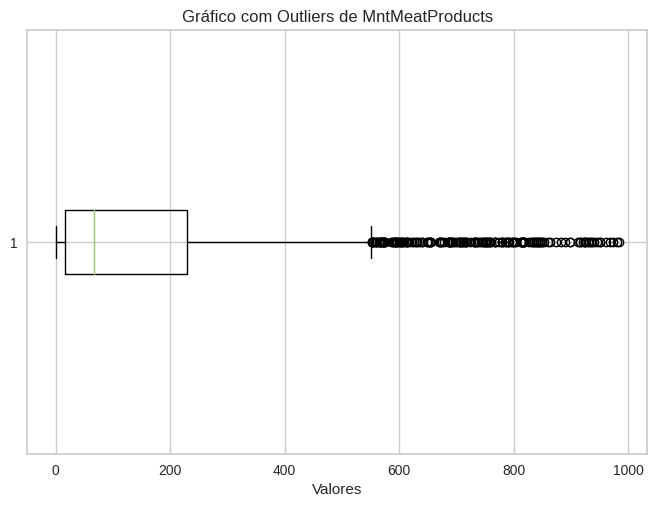

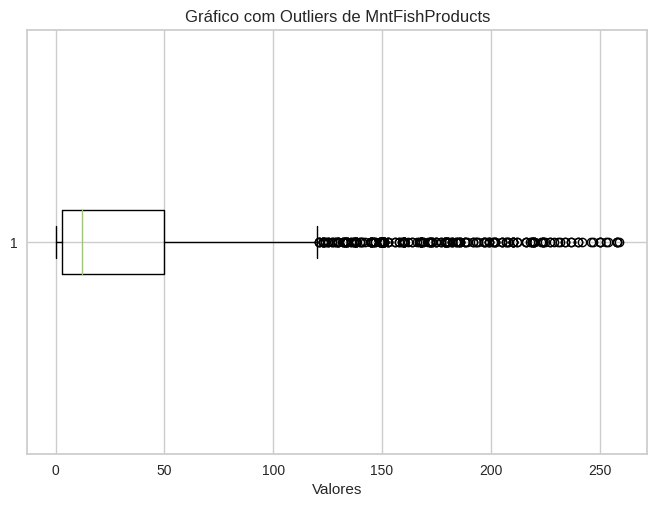

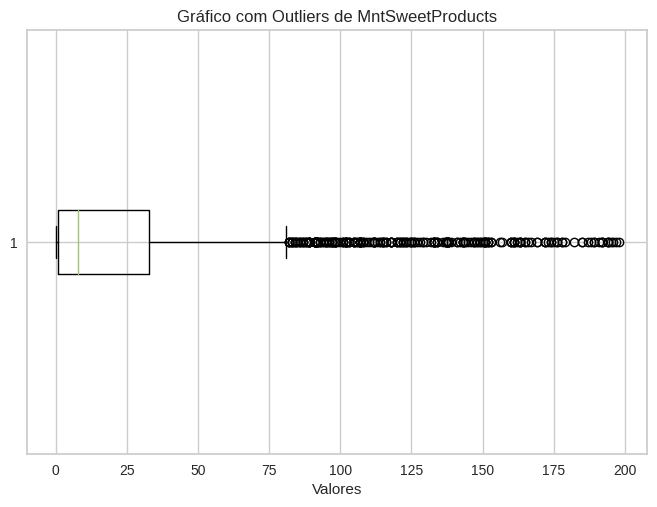

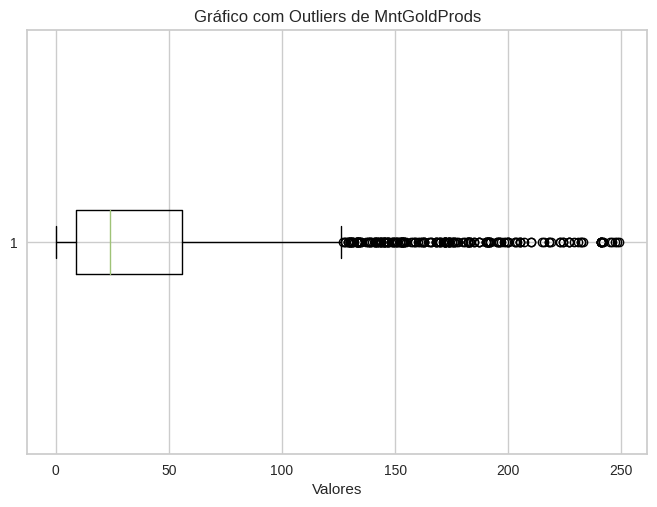

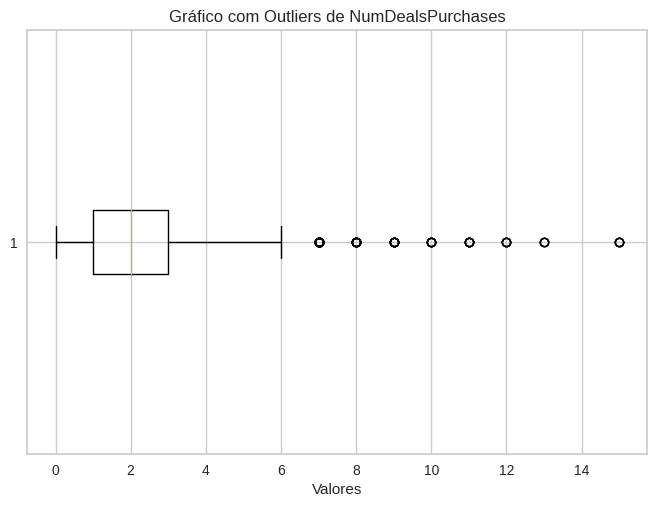

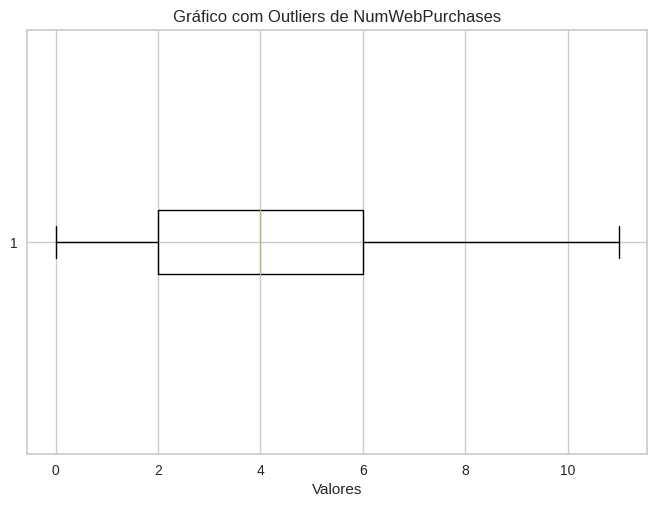

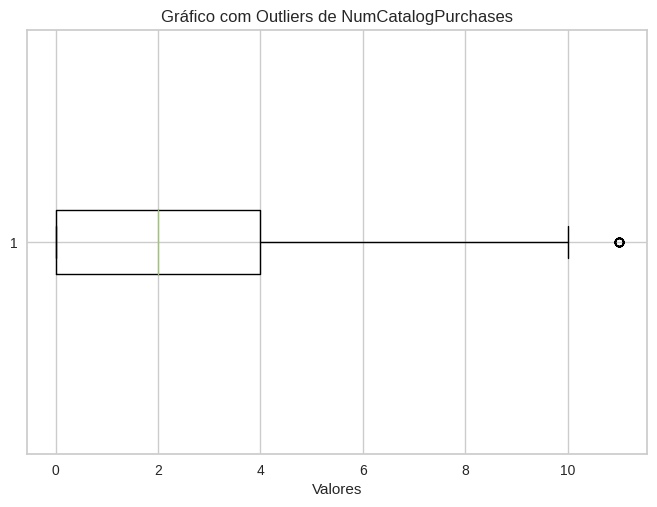

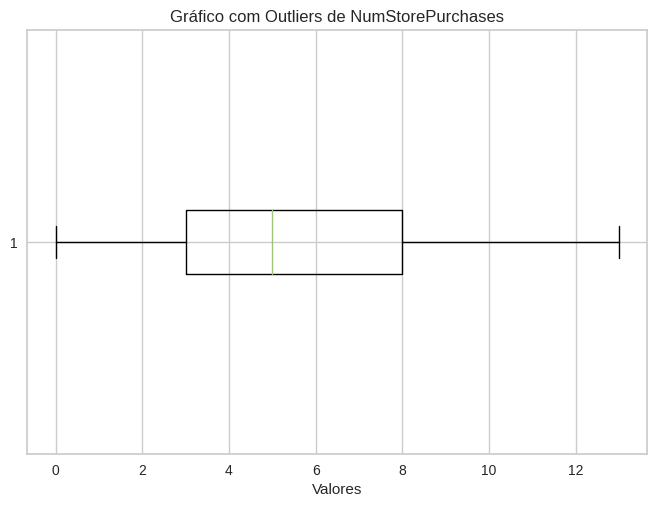

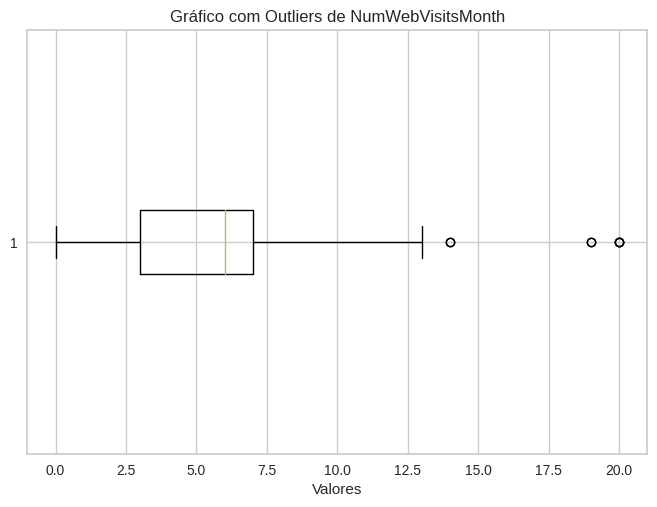

In [ ]:
for coluna in colunas_valor:
  outliers(coluna)

In [ ]:
#Cria uma coluna com o tempo de registro. Subtrai a data do último inscrito e a data do usuário.
campanha['Registration_Time'] = (campanha['Dt_Customer'].max() - campanha['Dt_Customer']).dt.days

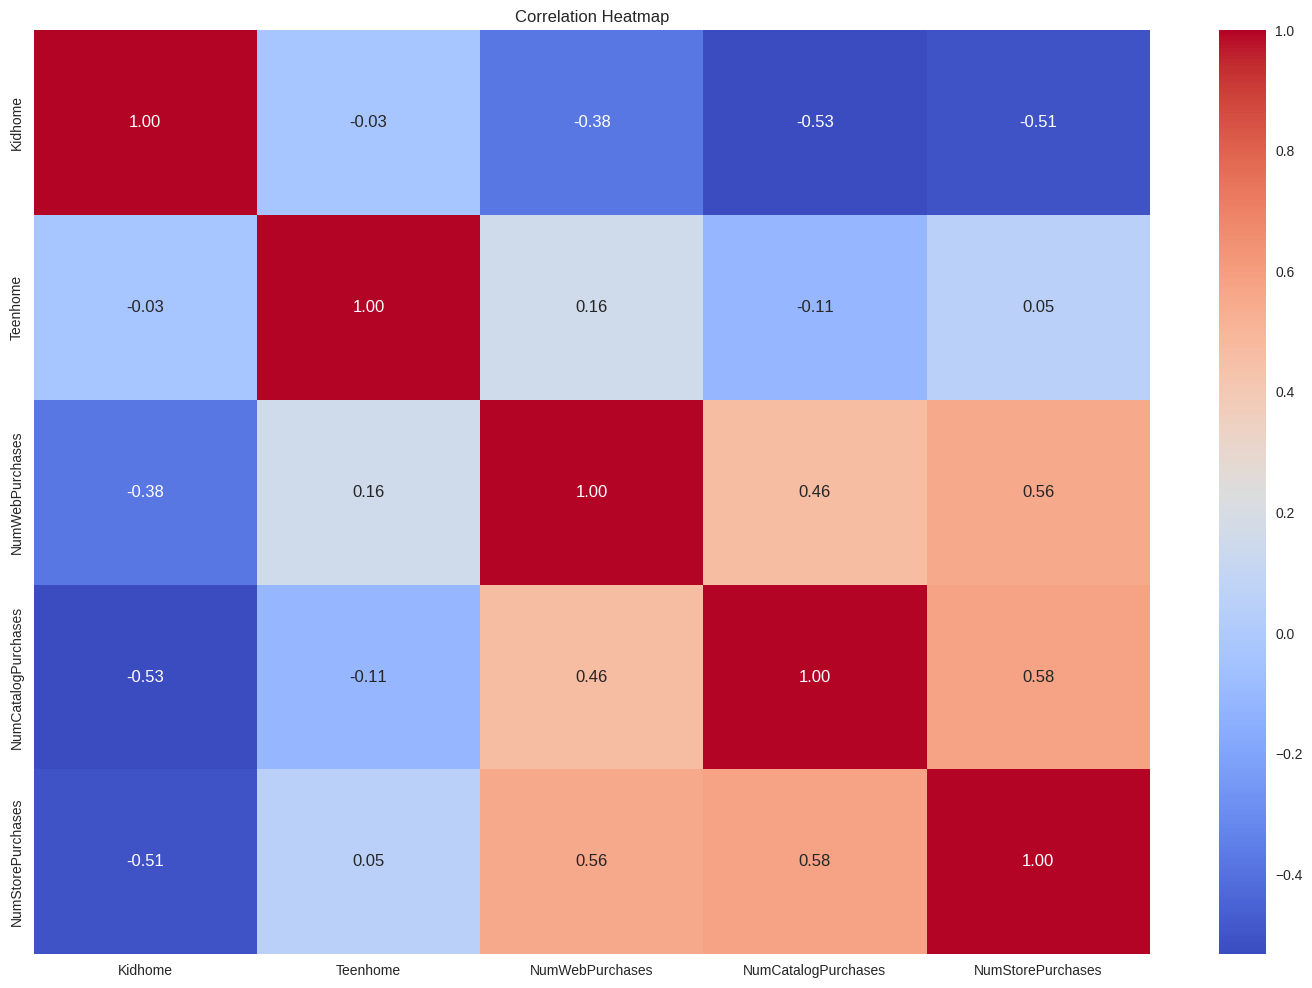

In [ ]:
#Separar as colunas para avaliar correlação entre filhos e origem da compra
campanha_subset = campanha[['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Calcule a matriz de correlação
correlation_matrix = campanha_subset.corr()

# Exiba a matriz de correlação através do mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Criar uma função para avaliar correlação entre número de filhos crianças e adolescentes com a origem da compra
def correlacao(filhos):
  campanha_testes = campanha.copy()
  # Crie uma lista com os diferentes números de filhos presentes no dataframe
  num_children_values = campanha[filhos].unique()

  #Itere sobre cada número de filhos e crie uma nova coluna para cada valor
  for num_children in num_children_values:
    # Crie uma nova coluna com cada valor de filhos e preencha com 1 se o número de filhos for igual a num_children, caso contrário preencha com 0
    campanha_testes[f'children_{num_children}'] = (campanha_testes[filhos] == num_children).astype(int)

  # Selecione as colunas relevantes para calcular a correlação
  campanha_subset = campanha_testes[[filhos] + [f'children_{num_children}' for num_children in num_children_values] + ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts']]

  # Calcule a matriz de correlação
  #correlation_matrix = campanha_subset.drop([filhos], axis=1)
  campanha_subset = campanha_subset.drop([filhos], axis=1)
  correlation_matrix = campanha_subset.corr()

  # Exiba a matriz de correlação através do mapa de calor
  plt.figure(figsize=(18, 12))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Heatmap')
  plt.show()

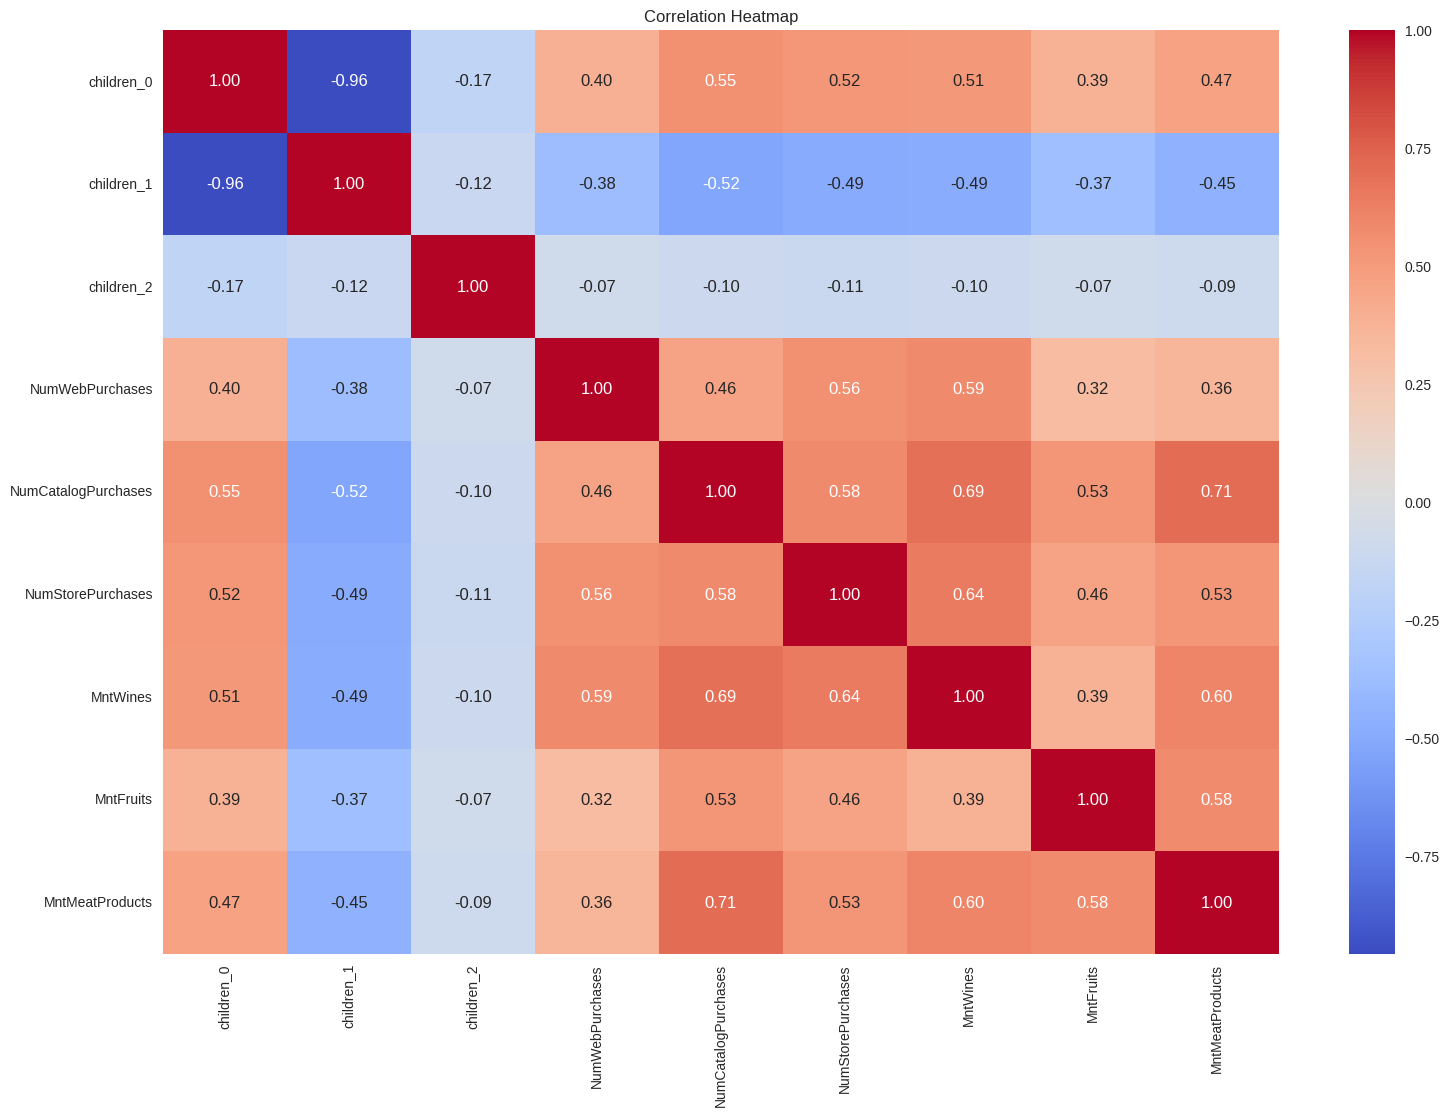

In [ ]:
#Avaliar a correlação entre filhos pequenos e tipo de compras.
correlacao('Kidhome')

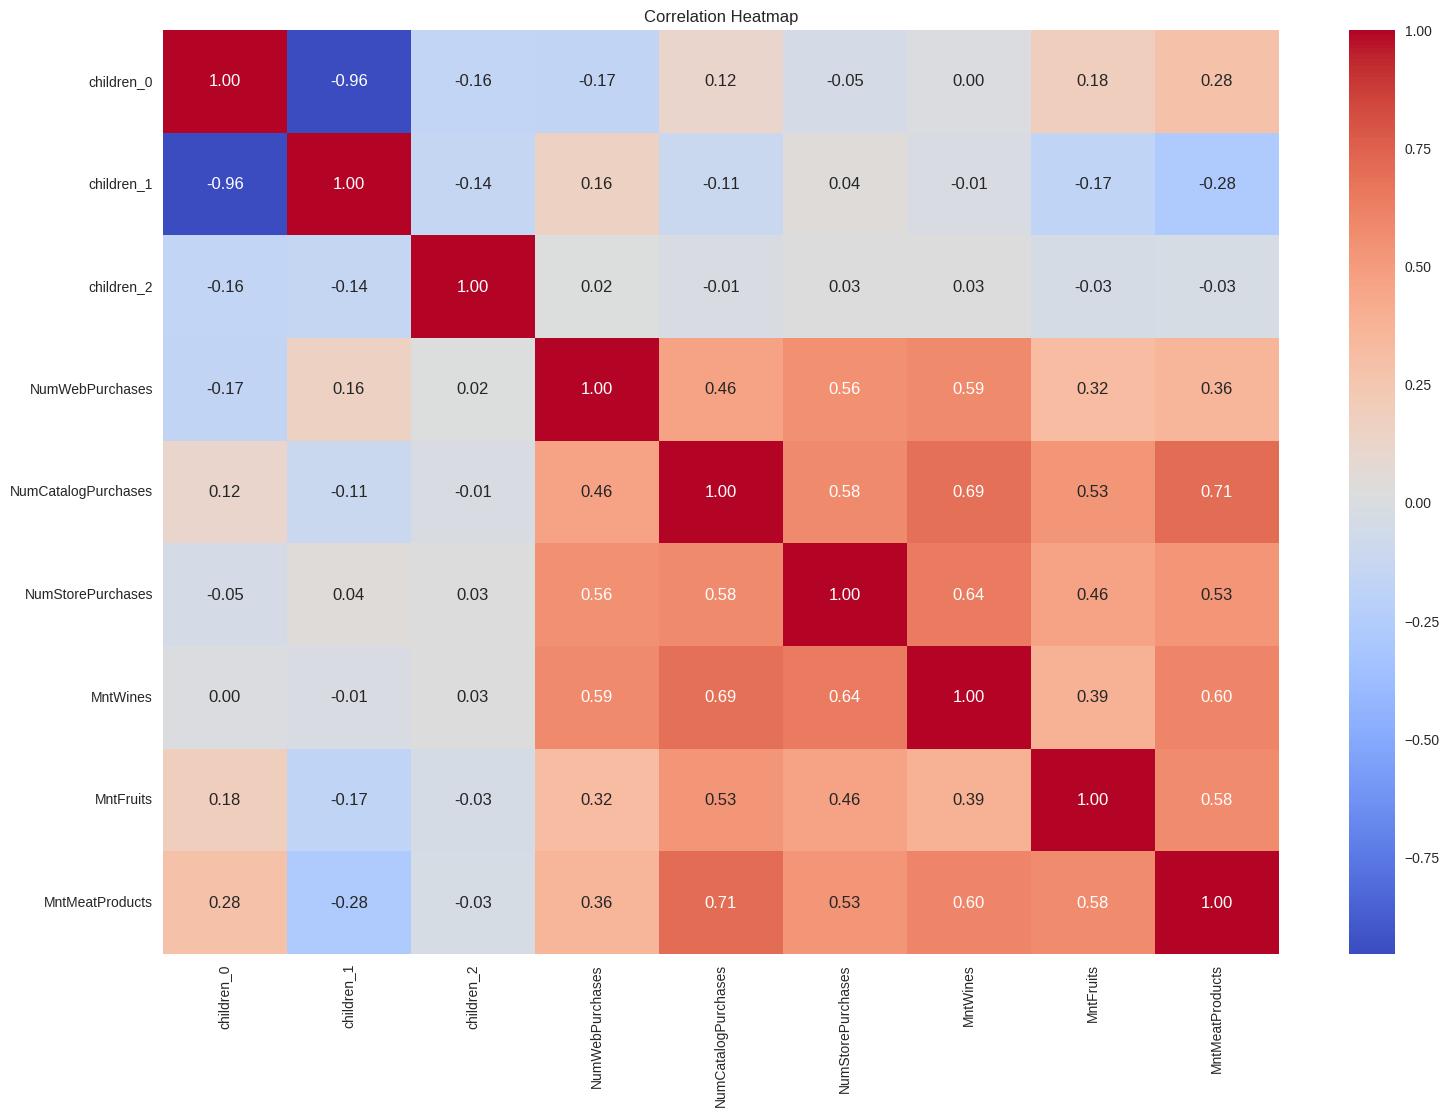

In [ ]:
#Avaliar a correlação entre filhos adolescentes e tipo de compras.
correlacao('Teenhome')

In [ ]:
#Após identificar que o número de filhos não apresenta uma correlação relevante crio uma nova coluna no dataframe principal com a soma do número de filhos criança e adolescente
campanha['Num_Children'] = campanha['Kidhome'] + campanha['Teenhome']

In [ ]:
#Cria uma coluna com o total de itens comprados (soma das colunas da categoria da compra)
campanha['Purchases'] = campanha['NumWebPurchases'] + campanha['NumCatalogPurchases'] + campanha['NumStorePurchases']

In [ ]:
#Cria uma coluna com o valor total gastos (soma das colunas dos produtos compras)
campanha['Total_Amount'] = campanha['MntWines'] + campanha['MntFruits'] + campanha['MntMeatProducts'] + campanha['MntFishProducts'] + campanha['MntSweetProducts'] + campanha['MntGoldProds']

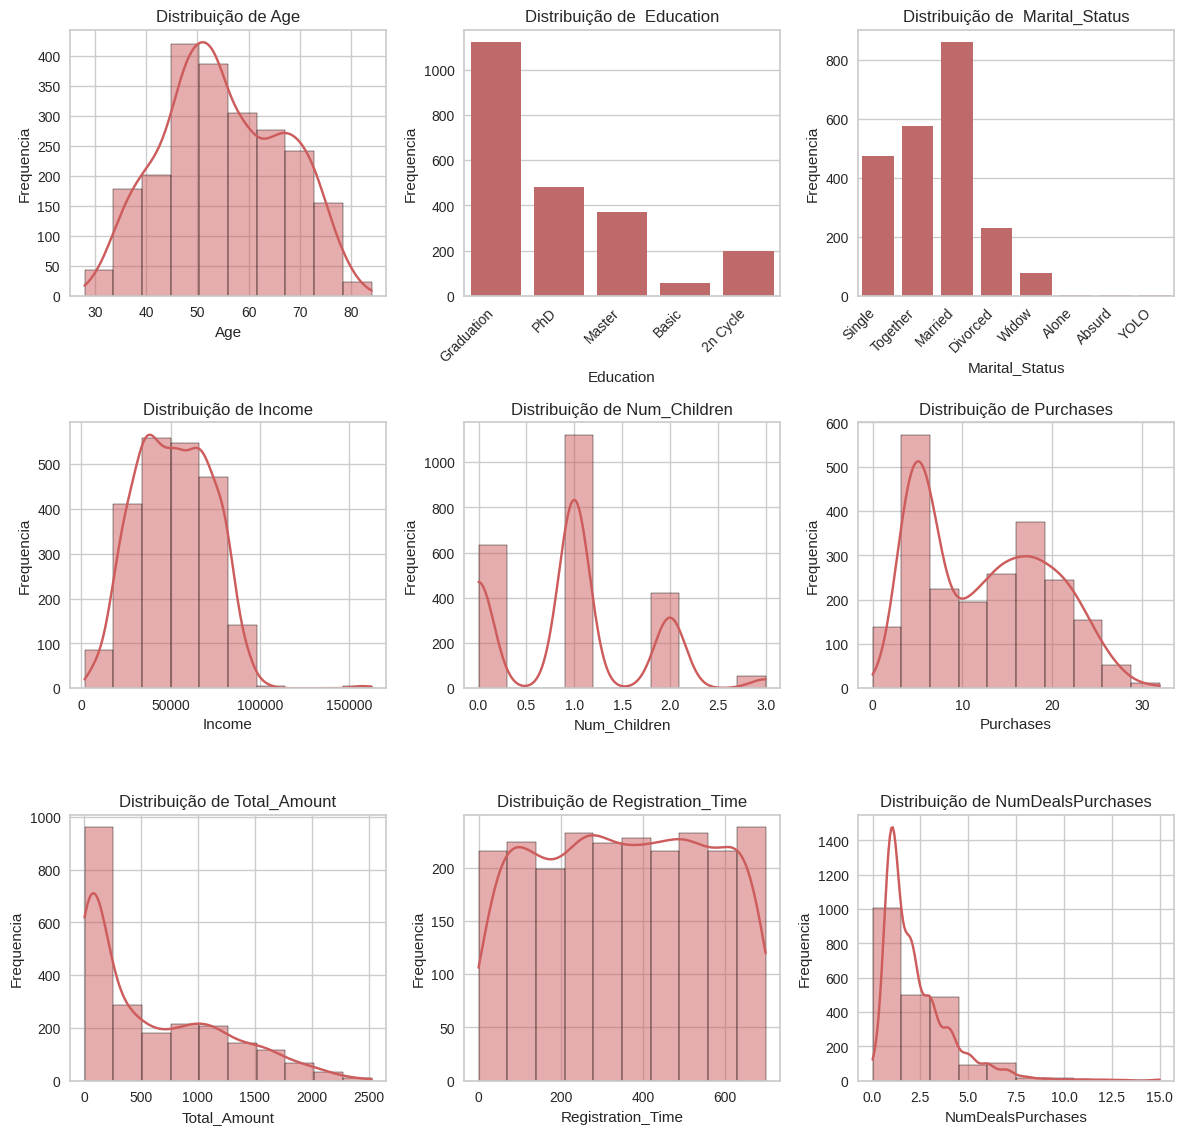

In [ ]:
#Distribuição dos dados
plt.figure(figsize=(12, 15))

#Defina as colunas a serem plotadas
columns_to_plot = ['Age', 'Education', 'Marital_Status', 'Income', 'Num_Children', 'Purchases', 'Total_Amount', 'Registration_Time','NumDealsPurchases']

#Criação do grafico de coluna para cada item do dataframe
for i, column in enumerate(columns_to_plot, start=1):
  plt.subplot(4, 3, i)
  if campanha[column].dtype == 'object':
    # Para colunas categóricas, plote como gráfico de contagem
    sns.countplot(data=campanha, x=column, color='indianred')
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribuição de  {column}')
  else:
    # Para colunas numéricas, plote como histograma
    sns.histplot(data=campanha, x=column, bins=10, kde=True, color='indianred', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.title(f'Distribuição de {column}')

#Ajuste do layout
plt.tight_layout()

#Apresentação dos plots
plt.show()

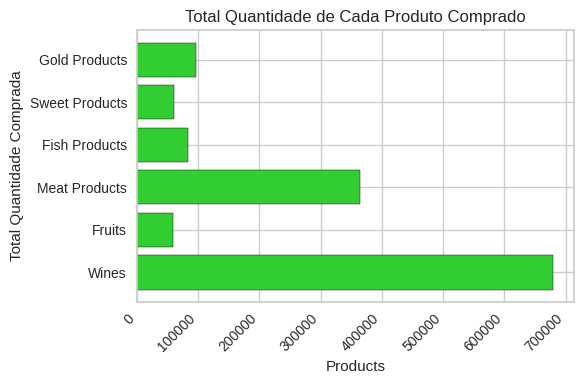

In [ ]:
#Defina as colunas a serem plotadas
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#Calcule o valor total de cada produto adquirido
total_amounts = [campanha[column].sum() for column in columns_to_plot]

#Defina os nomes dos produtos para os rótulos do eixo x
product_names = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']

#Creação do gráfico de barh
plt.figure(figsize=(6, 4))
plt.barh(product_names, total_amounts, color='limegreen', edgecolor='black')
plt.xlabel('Products')
plt.ylabel('Total Quantidade Comprada')
plt.title('Total Quantidade de Cada Produto Comprado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Apresentação dos plots
plt.show()

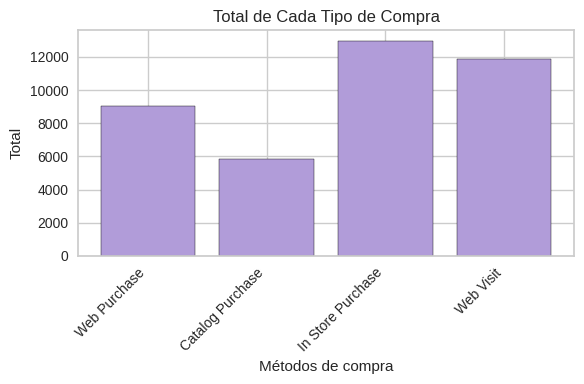

In [ ]:
#Separar as colunas relevantes para contagem dos elementos de cada categoria
colunas_plot = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

total_amounts = [campanha[column].sum() for column in colunas_plot]

methods = ['Web Purchase', 'Catalog Purchase', 'In Store Purchase', 'Web Visit']

plt.figure(figsize=(6, 4))
plt.bar(methods, total_amounts, color='#B19CD9', edgecolor='black')
plt.xlabel('Métodos de compra')
plt.ylabel('Total')
plt.title('Total de Cada Tipo de Compra')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Modelagem e Desenvolvimento

In [ ]:
#Elimina as colunas 'Kidhome' e 'Teenhome'. Essas foram juntas criando a coluna 'Num_Children'
#Elimina as colunas 'NumWebPurchases', 'NumCatalogPurchases' e 'NumStorePurchases'. Essas foram juntas criando a coluna 'Purchases'
campanha = campanha.drop(['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1)

In [ ]:
#Mostrar da coluna 'Education' as caracteristicas únicas
campanha['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Mostrar da coluna 'Marital_Status' as caracteristicas únicas
campanha['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
campanha['Education'] = campanha['Education'].map({'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5})
campanha['Marital_Status'] = campanha['Marital_Status'].map({'Absurd': 1, 'YOLO': 2, 'Alone': 3, 'Single': 4, 'Together': 5, 'Married': 6, 'Divorced': 7, 'Widow': 8})

In [ ]:
#Separa as colunas relevantes para avaliar componentes principais
X = campanha[['Age', 'Education', 'Marital_Status', 'Income', 'Num_Children', 'Registration_Time', 'Purchases', 'Total_Amount']].copy()

In [ ]:
#Cria PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

In [ ]:
#Cria uma função para mostrar o PCA geral e de cada coluna
def relevante(coluna=''):
  if coluna:
    sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=getattr(X, coluna))
  else:
    sns.scatterplot(x=pca_df[0], y=pca_df[1])

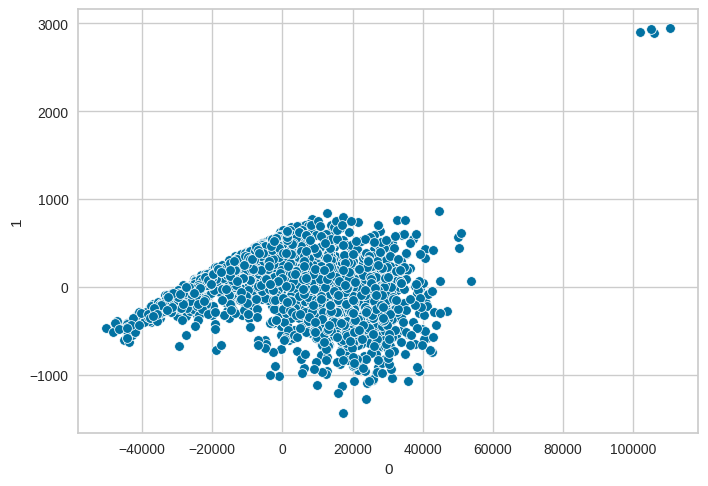

In [ ]:
#Usar a função recêm criada pra plot geral dos dados
relevante()

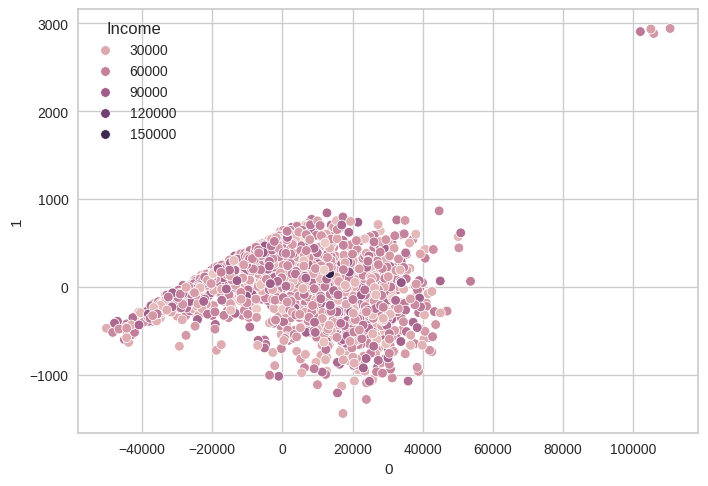

In [ ]:
#Cria um plot dos dados da coluna 'Income'
relevante('Income')
# A renda não parece ser relevante.

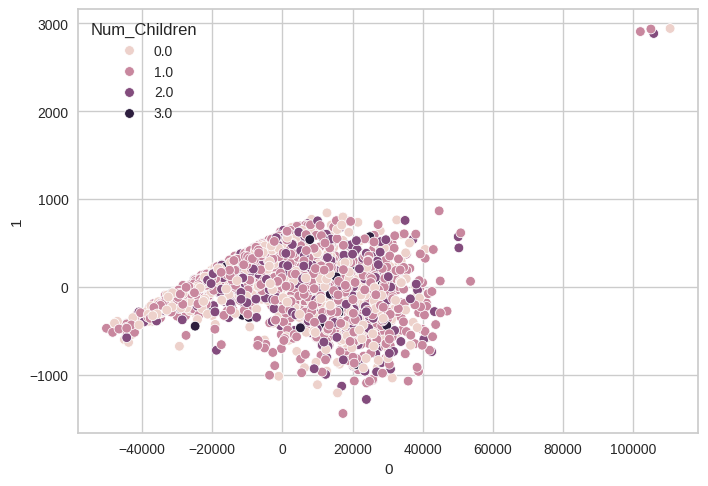

In [ ]:
#Cria um plot dos dados da coluna 'Num_Children'
relevante('Num_Children')
#O número de filhos não parece ser relevante.

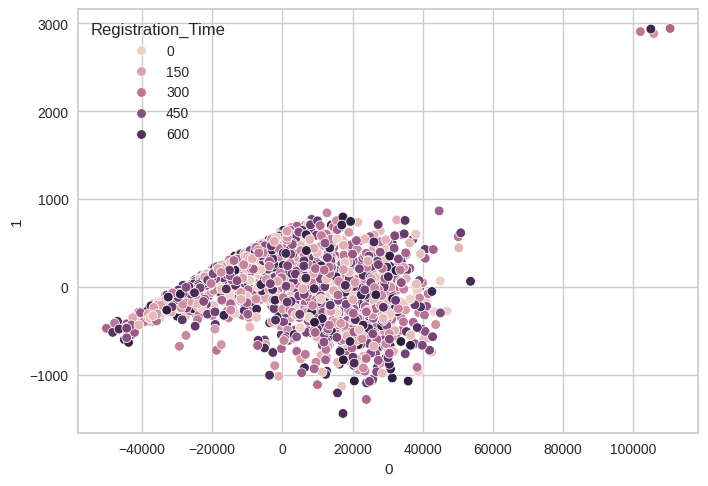

In [ ]:
#Cria um plot dos dados da coluna 'Registration_Time'
relevante('Registration_Time')
#O tempo de registro não parece ser relevante.

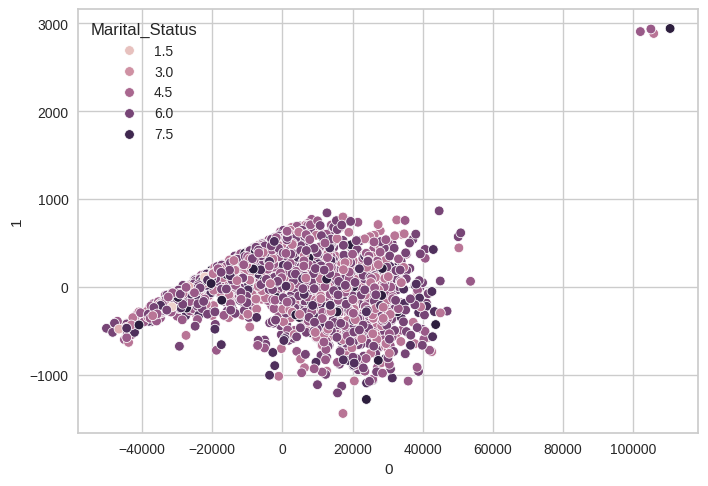

In [ ]:
#Cria um plot dos dados da coluna 'Marital_Status'
relevante('Marital_Status')
#O estado civil não parece ser relevante

In [ ]:
#Colunas usadas para treinar modelo com as características relevantes para clustering (usa as colunas já separadas anteriormente um título 'X')
modelo = X
#Usado para filtrar colunas do DataFrame com base nos rótulos das colunas crianco uma copia
transform = campanha.filter(modelo).copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

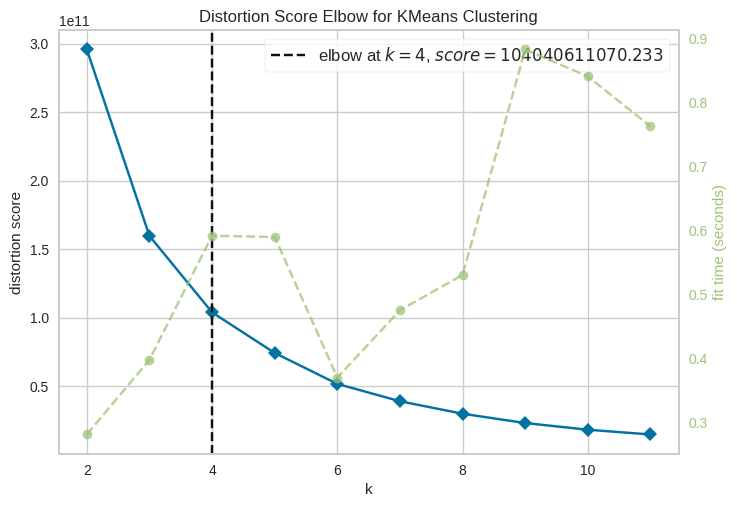

In [ ]:
#Ajuda a selecionar o número ideal de clusters
kelbow_visualizer(KMeans(), transform, k=11);

In [ ]:
#Criar modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)
y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

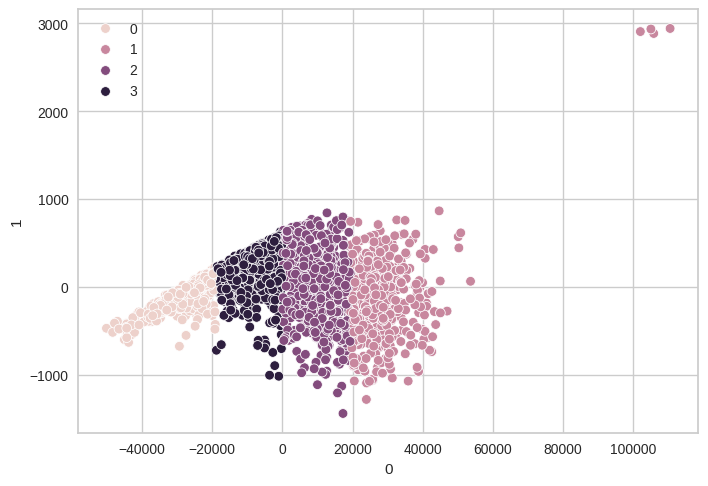

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

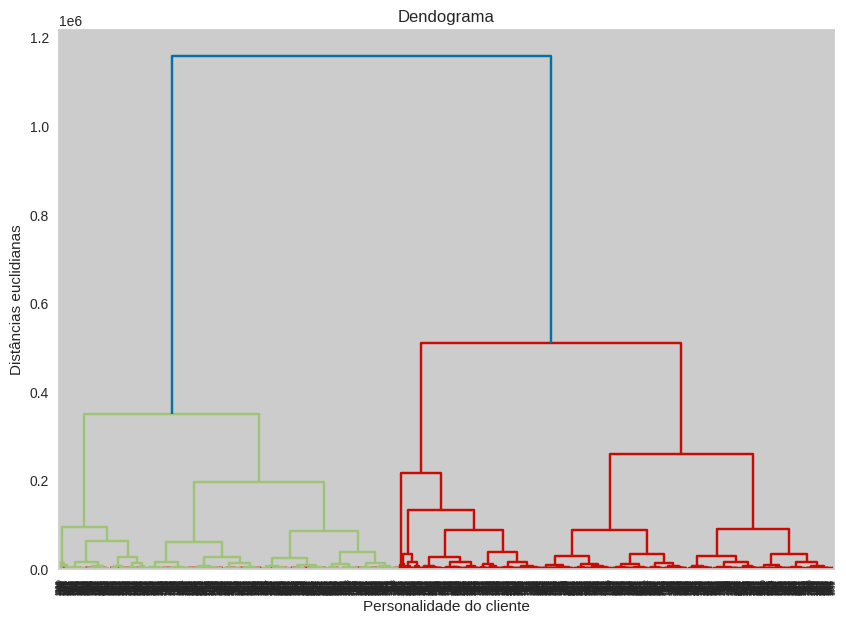

In [ ]:
#Crie e exiba um dendograma
plt.figure(figsize=(10, 7))
plt.title('Dendograma')
plt.xlabel('Personalidade do cliente')
plt.ylabel('Distâncias euclidianas')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))